### Import Libraries

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Activation
import matplotlib.pyplot as plt
%matplotlib inline
import random
from keras.utils import to_categorical
import numpy as np

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Downlaod and Load Data

In [80]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data(r'D:\Software and Web Development\Machine Learning\Memristor/mnist.nzp')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Visual of the data

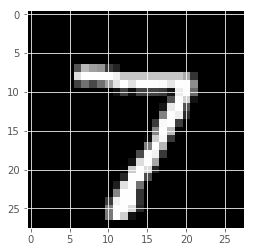

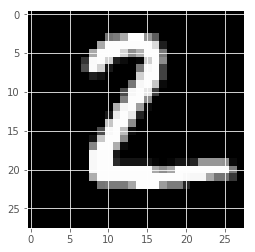

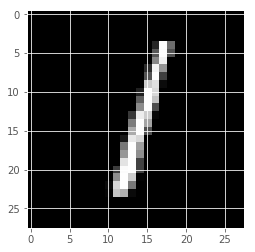

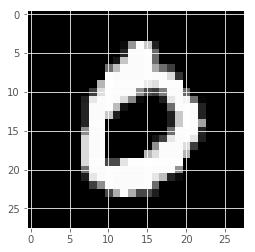

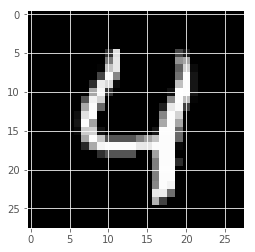

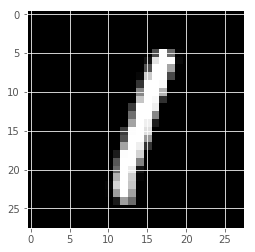

In [81]:
plt.imshow(X_train[0], cmap='gray')
for i in range(6):
    plt.imshow(X_test[i], cmap='gray')
    plt.show()

### Reshape the data

In [82]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [83]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [84]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [85]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [86]:
X_train[0].shape

(28, 28, 1)

### Build The Model

In [87]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))


model.add(Dense(10, activation='softmax'))

#####################################
#    MODEL WEIGHTS AFTER TRAINING   #
#####################################
# model.load_weights('weights_MNIST_CNN_npy.npy')
# weights = np.load('weights_MNIST_CNN_npy.npy')

#####################################
#     MEMRISTOR WEIGHTS MODEL       #
#####################################
weights = np.load('Memristor_weights.npy')
model.set_weights(weights)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
              
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_4 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [10]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=15, verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 59s 1ms/step - loss: 0.2971 - acc: 0.9624 - val_loss: 0.1702 - val_acc: 0.9754
Epoch 2/15
48000/48000 [==============================] - 62s 1ms/step - loss: 0.0572 - acc: 0.9892 - val_loss: 0.1403 - val_acc: 0.9782
Epoch 3/15
48000/48000 [==============================] - 67s 1ms/step - loss: 0.0234 - acc: 0.9946 - val_loss: 0.1200 - val_acc: 0.9812
Epoch 4/15
48000/48000 [==============================] - 67s 1ms/step - loss: 0.0090 - acc: 0.9977 - val_loss: 0.1306 - val_acc: 0.9794
Epoch 5/15
48000/48000 [==============================] - 61s 1ms/step - loss: 0.0048 - acc: 0.9990 - val_loss: 0.1287 - val_acc: 0.9800
Epoch 6/15
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0059 - acc: 0.9988 - val_loss: 0.1437 - val_acc: 0.9795
Epoch 7/15
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0171 - acc: 0.9956 - val_loss: 0.1448 - val_acc

### Data plot

Text(0.5,0,'Epochs')

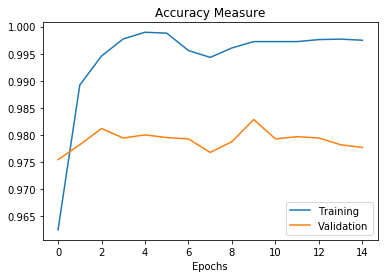

In [11]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy Measure')
plt.xlabel('Epochs')

Text(0.5,0,'Epochs')

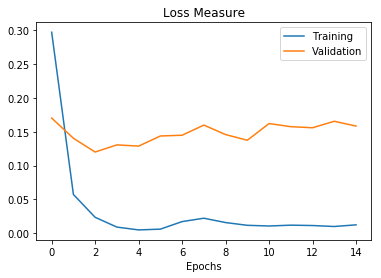

In [12]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss Measure')
plt.xlabel('Epochs')

### Prediction

In [88]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 5s 506us/step


[0.14389570077299677, 0.9784]

[7 2 1 0 4 1]


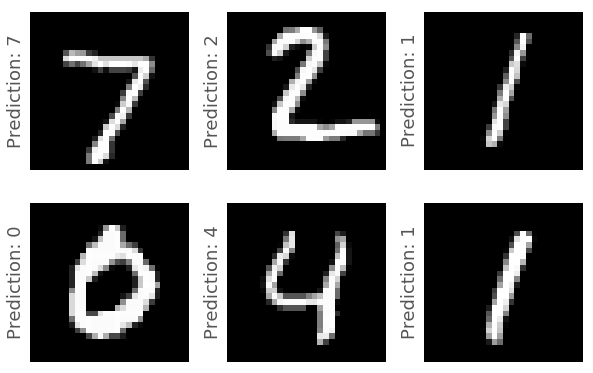

In [91]:
res = model.predict_classes(X_test[:6])
plt.figure(figsize=(10, 10))
print(res)
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i,:,:].reshape((28,28)), cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('Prediction: %d' % res[i], fontsize=18)
plt.show()

In [14]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = model.predict(X_test)

In [15]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Save Network Weights

In [17]:
filename='weights_MNIST_CNN_3.hdf5'
filename2='weights_MNIST_CNN_npy.npy'
model.save_weights(filename, overwrite=True)
np.save(filename2, model.get_weights())

# np.save("MNIST_model_weights", model.get_weights())

### Loading the existing Weights to the Model

In [18]:
filename = 'weights_MNIST_CNN_9838_Copy.hdf5'
model.load_weights(filename)

In [19]:
model.evaluate(X_test.reshape(-1, 28,28, 1), y_test_cat)

10000/10000 [==============================] - 2s 209us/step


[0.16905573127097728, 0.9838]

### Network Configuration

In [20]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 28, 28, 1),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_1',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strides': (2, 2),
   'trainable': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 

### Layer Configuration

In [21]:
model.layers[0].get_config()

{'activation': 'linear',
 'activity_regularizer': None,
 'batch_input_shape': (None, 28, 28, 1),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 32,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'conv2d_1',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

### Layer Parameters

In [22]:
model.layers[5].count_params()

1290

### Layer Weights

In [23]:
model.layers[5].get_weights()

[array([[ 0.11351483, -0.17615978,  0.07844748, ..., -0.23185417,
         -0.17213464, -0.22722425],
        [-0.2826825 ,  0.02082488, -0.02816818, ...,  0.13212596,
         -0.09849901, -0.14897484],
        [-0.20734544,  0.00446294, -0.10725888, ..., -0.08573879,
         -0.10738628,  0.1672231 ],
        ...,
        [ 0.05486639, -0.07418063,  0.09722518, ..., -0.10558125,
          0.00266135,  0.21312694],
        [ 0.185932  , -0.06869792, -0.17476228, ..., -0.2173489 ,
          0.00039594,  0.17398785],
        [ 0.02149421,  0.20525612,  0.05657687, ...,  0.07746347,
         -0.22011057,  0.03864266]], dtype=float32),
 array([-0.03499323,  0.02051384, -0.01168328,  0.03862566, -0.00473118,
         0.00205333, -0.01489796,  0.01445956, -0.0212295 , -0.01097151],
       dtype=float32)]

### Layer Biases

In [24]:
W = model.layers[0].get_weights()
W[0]

array([[[[-7.97577798e-02, -1.13120459e-01, -1.69791967e-01,
           2.60250401e-02, -9.52822156e-05, -6.38687238e-02,
           1.92734937e-03,  4.28716466e-02, -5.94999129e-03,
           3.47990766e-02, -1.16105573e-02, -6.46102726e-02,
           2.60662753e-02,  6.43707719e-03, -1.64652038e-02,
           3.45620811e-02,  2.29379665e-02,  9.27933771e-03,
          -1.38581976e-01, -1.18661724e-01, -7.28237163e-03,
          -3.01689599e-02, -1.58826888e-01, -1.91871766e-02,
          -1.80819968e-03,  1.36589054e-02, -2.07523815e-02,
          -6.09496832e-02, -5.50342277e-02, -6.98657930e-02,
          -1.48841426e-01, -1.34487465e-01]],

        [[-8.52077007e-02, -4.53017205e-02, -5.31311855e-02,
          -5.32387793e-02, -3.23701999e-03,  2.88369088e-03,
          -1.55950217e-02, -5.34010082e-02, -1.01233996e-01,
          -1.00025356e-01,  1.07073210e-01,  6.07960224e-02,
          -1.27707720e-01, -1.09402657e-01, -4.09097448e-02,
          -1.85888037e-02,  7.92167410

### Convolution Visualisation

In [25]:
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\program files\python36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [26]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)

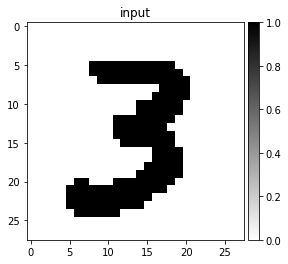

In [27]:
i = 4600

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]

plt.figure()
plt.title('input')
nice_imshow(plt.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=matplotlib.cm.binary)

In [28]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic


W shape :  (3, 3, 32)


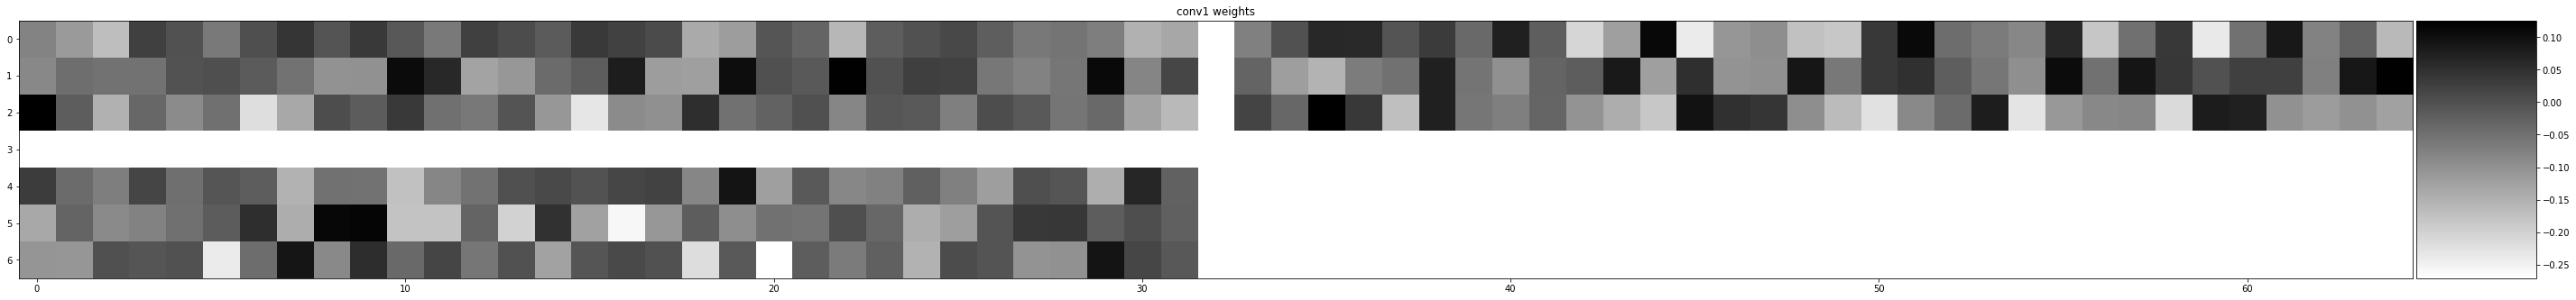

In [29]:
# Visualize weights
W = model.layers[0].get_weights()[0]
W = np.squeeze(W)
print("W shape : ", W.shape)

plt.figure(figsize=(50, 50))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W, 2, 2), cmap=matplotlib.cm.binary)

### Save Model as JSON File

In [30]:
from keras.models import model_from_json
json_model = model.to_json()
with open("MNIST_model.json", "w") as json_file:
    json_file.write(json_model)
# serialize weights to HDF5
model.save_weights("MNIST_model_weights.h5")
print("Model Saved!")

Model Saved!


### Load json and create model

In [31]:
json_file = open('MNIST_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("MNIST_model_weights.h5")